# WeatherPy
----

### Analysis

* The warmest weather can be seen near equator (0 Deg. Latitude). For latitudes in (-60, 20) degrees range the temprature is between 60F to 90F(warmer weather) and for lattitudes above 40 degrees the temprature is mostly below 40F(cooler weather). The southern hemisphere is much warmer than the northern hemisphere this time of the year due to the tilt of the earth.

* There is no strong relationship between latitude and humidity. However, there is a heavier concentration of cities in (60% to 100%) humidity at this time of the year.

* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0%, 75%, and 90% cloudiness at this time of the year.

* There is no strong relationship between latitude and wind speed. However, there is a heavier concentration of cities in (0mph to 15mph) wind speed and there are few cities with wind speeds greater than 25mph that all sit at latitudes above 40F and below -40F at this time of the year.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# The desired response units (imperial for values in Fahrenheit)
units = "imperial"
# Base URL for Weather API
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Initializing variables
record_counter = 1
set_counter = 1
weather_df  = []

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    try:
        # Constructing the query_url and getting the response for the request
        query_url = f"{base_url}appid={api_key}&q={city}&units={units}"
        response = requests.get(query_url).json()
        
        # Saving the desired info from the json response in a list of dictionaries
        weather_df.append({
                        "City": response["name"],
                        "Cloudiness": response["clouds"]["all"],
                        "Country": response["sys"]["country"],
                        "Date": int(time.time()),
                        "Humidity": response["main"]["humidity"],
                        "Lat": response["coord"]["lat"],
                        "Lng": response["coord"]["lon"],
                        "Max Temp": response["main"]["temp_max"],
                        "Wind Speed": response["wind"]["speed"]
        })
        print(f"Processing Record {record_counter} of Set {set_counter} | {response['name']}")
       
        # For printing response processing in a sets of 50
        if record_counter == 50:
            set_counter = set_counter + 1  
            record_counter = 0
              
        record_counter = record_counter + 1
              
        # Adding time delay to insure not exceeding the max request number per minute
        time.sleep(1)
              
    # Skip the cities not found in Weather API and continue code execution    
    except KeyError:
        print("City not found. Skipping...")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Clyde River
Processing Record 2 of Set 1 | Denpasar
Processing Record 3 of Set 1 | Arraial do Cabo
Processing Record 4 of Set 1 | Ushuaia
Processing Record 5 of Set 1 | Pevek
Processing Record 6 of Set 1 | Atuona
Processing Record 7 of Set 1 | Albany
Processing Record 8 of Set 1 | Hithadhoo
Processing Record 9 of Set 1 | Lamentin
Processing Record 10 of Set 1 | Rikitea
Processing Record 11 of Set 1 | Kodiak
Processing Record 12 of Set 1 | Hamilton
Processing Record 13 of Set 1 | Padang
Processing Record 14 of Set 1 | Nikolskoye
Processing Record 15 of Set 1 | Kapaa
Processing Record 16 of Set 1 | Esperance
Processing Record 17 of Set 1 | Butaritari
Processing Record 18 of Set 1 | Port Alfred
Processing Record 19 of Set 1 | Tiksi
Processing Record 20 of Set 1 | Uva
Processing Record 21 of Set 1 | San Cristobal
City not found. Skipping...
Processing Record 22 of Set 1 | Humboldt
Processing Record 23 of 

Processing Record 37 of Set 4 | Virginia Beach
Processing Record 38 of Set 4 | Corsicana
Processing Record 39 of Set 4 | Mapimi
Processing Record 40 of Set 4 | Maldonado
Processing Record 41 of Set 4 | Mitsamiouli
Processing Record 42 of Set 4 | Arica
Processing Record 43 of Set 4 | Mishan
Processing Record 44 of Set 4 | Cangucu
Processing Record 45 of Set 4 | Soreang
Processing Record 46 of Set 4 | Diban
City not found. Skipping...
Processing Record 47 of Set 4 | Palmer
Processing Record 48 of Set 4 | Wagar
City not found. Skipping...
Processing Record 49 of Set 4 | Ordynskoye
Processing Record 50 of Set 4 | Guozhen
Processing Record 1 of Set 5 | Comodoro Rivadavia
Processing Record 2 of Set 5 | Edgewater
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 3 of Set 5 | Syracuse
Processing Record 4 of Set 5 | Luderitz
Processing Record 5 of Set 5 | Rivadavia
City not found. Skipping...
Processing Record 6 of Set 5 | Constitucion
Process

Processing Record 19 of Set 8 | Geraldton
Processing Record 20 of Set 8 | Umm Lajj
Processing Record 21 of Set 8 | Brae
City not found. Skipping...
Processing Record 22 of Set 8 | Pervomayskoye
City not found. Skipping...
Processing Record 23 of Set 8 | Trapani
Processing Record 24 of Set 8 | Kawalu
Processing Record 25 of Set 8 | Manado
Processing Record 26 of Set 8 | Yerbogachen
Processing Record 27 of Set 8 | Kailua
City not found. Skipping...
City not found. Skipping...
Processing Record 28 of Set 8 | Ahipara
Processing Record 29 of Set 8 | Hammerfest
Processing Record 30 of Set 8 | Saldanha
Processing Record 31 of Set 8 | Llangefni
Processing Record 32 of Set 8 | Klyuchi
Processing Record 33 of Set 8 | Shizunai
Processing Record 34 of Set 8 | Namatanai
Processing Record 35 of Set 8 | Novaya Zaimka
Processing Record 36 of Set 8 | Zapolyarnyy
Processing Record 37 of Set 8 | Misantla
City not found. Skipping...
Processing Record 38 of Set 8 | Kota Kinabalu
Processing Record 39 of Set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Creating a Dataframe and saving it to a file
weather_df = pd.DataFrame(weather_df)
weather_df.to_csv(output_data_file, index=False)
weather_df.count()

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [5]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Clyde River,75,CA,1545522081,75,70.47,-68.59,-13.01,12.75
1,Denpasar,20,ID,1545522082,83,-8.65,115.22,80.60,2.24
2,Arraial do Cabo,8,BR,1545522083,87,-22.97,-42.02,79.48,8.72
3,Ushuaia,40,AR,1545522084,71,-54.81,-68.31,53.60,26.40
4,Pevek,32,RU,1545522085,100,69.70,170.27,-23.89,1.90


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

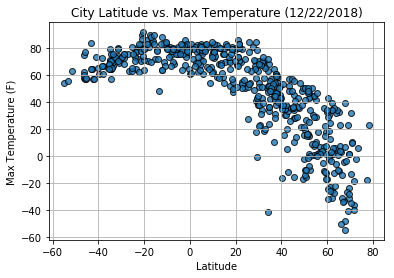

In [6]:
# Setting the analysis_date to the date when the data information was obtained
analysis_date = datetime.fromtimestamp(weather_df.iloc[0, 3]).strftime("%m/%d/%Y")

# Creating the Scatter Plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], alpha=0.8, edgecolors="black", linewidths=1)

# Incorporating other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({analysis_date})")

plt.savefig("./output_data/CityLatVsMaxTemp.png")

plt.show()

#### Latitude vs. Humidity Plot

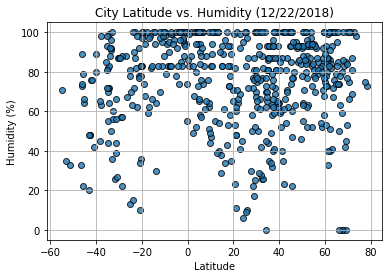

In [7]:
# Creating the Scatter Plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], alpha=0.8, edgecolors="black", linewidths=1)

# Incorporating other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({analysis_date})")

plt.savefig("./output_data/CityLatVsHumidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

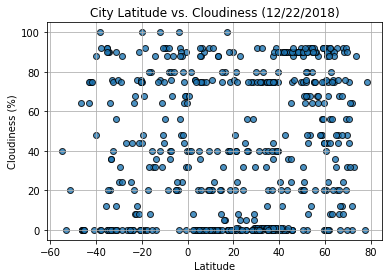

In [8]:
# Creating the Scatter Plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], alpha=0.8, edgecolors="black", linewidths=1)

# Incorporating other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({analysis_date})")

plt.savefig("./output_data/CityLatVsCloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

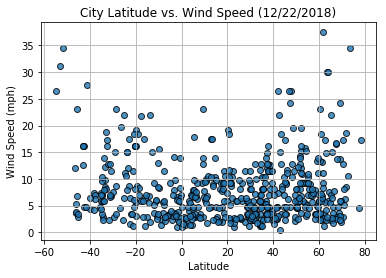

In [9]:
# Creating the Scatter Plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], alpha=0.8, edgecolors="black", linewidths=1)

# Incorporating other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({analysis_date})")

plt.savefig("./output_data/CityLatVsWindSpeed.png")

plt.show()